In [1]:
!pip install opencv-python
!pip install imutils
!pip install matplotlib
!pip install numpy

In [2]:
import cv2
import imutils
import os
import math
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cv2.__version__

'4.13.0'

In [4]:
IMG_DIR = "funky_images"

In [5]:
testImages = []
for dir_entry in os.scandir(IMG_DIR):
    testImages.append(cv2.imread(dir_entry.path))

### Як відобразити зображення?

In [6]:
def showImages(img_mat_list):
    if isinstance(img_mat_list, np.ndarray):
        img_mat_list = [img_mat_list]

    stacked = np.hstack(img_mat_list)
    rgb_image = cv2.cvtColor(stacked, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (5 * len(img_mat_list), 4))
    plt.axis('off')
    plt.imshow(rgb_image)

### Як зчитати зображення?

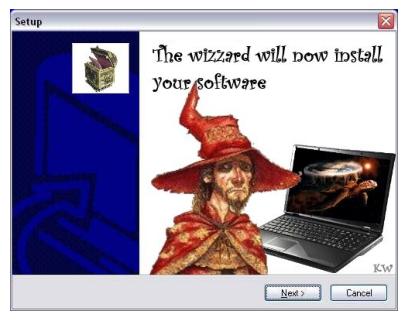

In [7]:
img = cv2.imread(os.path.join("funky_images", "982946977b7e474d6d65c31f4fd51d66.jpg"))
showImages(img)

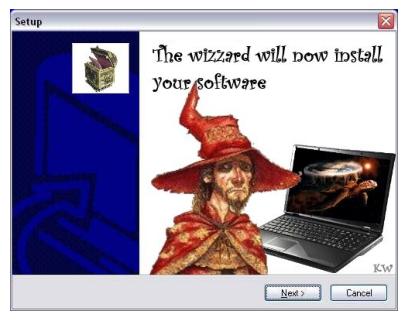

In [8]:
img = cv2.imread(os.path.join("funky_images", "982946977b7e474d6d65c31f4fd51d66.jpg"), cv2.IMREAD_COLOR)
showImages(img)

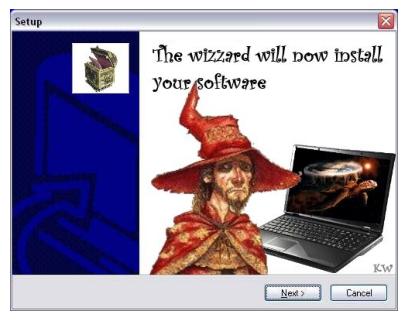

In [9]:
img = cv2.imread(os.path.join("funky_images", "982946977b7e474d6d65c31f4fd51d66.jpg"), cv2.IMREAD_UNCHANGED)
showImages(img)

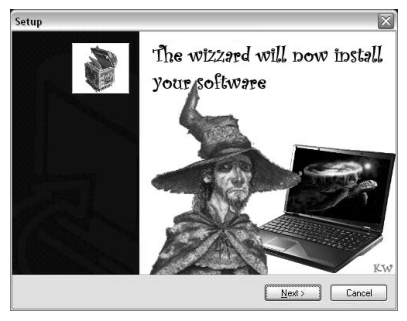

In [10]:
img = cv2.imread(os.path.join("funky_images", "982946977b7e474d6d65c31f4fd51d66.jpg"), cv2.IMREAD_GRAYSCALE)
showImages(img)

### Як зберегти файл?

In [11]:
cv2.imwrite('test.jpeg', img)

True

### Як отримати доступ до окремих пікселів?

In [12]:
for x, y in [(20, 80), (100, 110), (399, 500)]:
    (b, g, r) = testImages[3][x, y]
    print(f"{b = }, {g = }, {r = }")

b = np.uint8(255), g = np.uint8(255), r = np.uint8(255)
b = np.uint8(255), g = np.uint8(255), r = np.uint8(255)
b = np.uint8(255), g = np.uint8(255), r = np.uint8(255)


### Як зробити вирізання зображення?

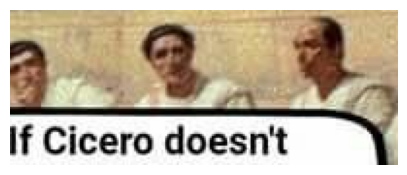

In [13]:
roi = testImages[4][40:120, 400:600]
showImages(roi)

### Як змінити розмір зображення?

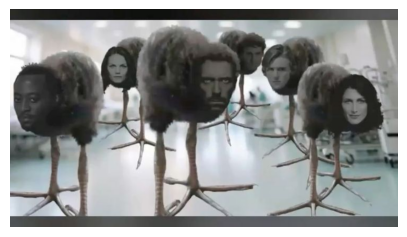

In [14]:
showImages(testImages[5]) 

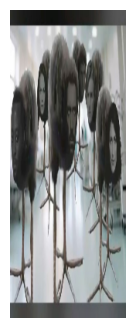

In [15]:
resized = cv2.resize(testImages[5], (150, 400))
cv2.imwrite('resized.jpeg', resized)
showImages(resized) 

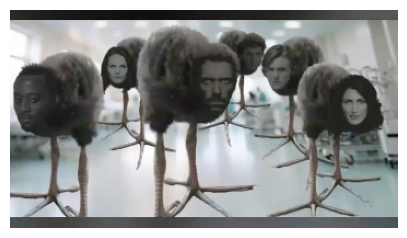

In [16]:
h, w = testImages[5].shape[0:2]
h_new = 200
ratio = w / h
w_new = int(h_new * ratio)
resized = cv2.resize(testImages[5], (w_new, h_new))
cv2.imwrite('resized_ratio.jpeg', resized)
showImages(resized)

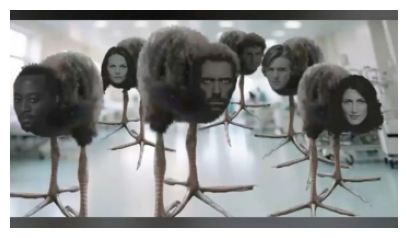

In [17]:
resized = imutils.resize(testImages[5], height=200)
cv2.imwrite('resized_imutils.jpeg', resized)
showImages(resized)

### Як повернути зображення?
cv2 and imutils rotation

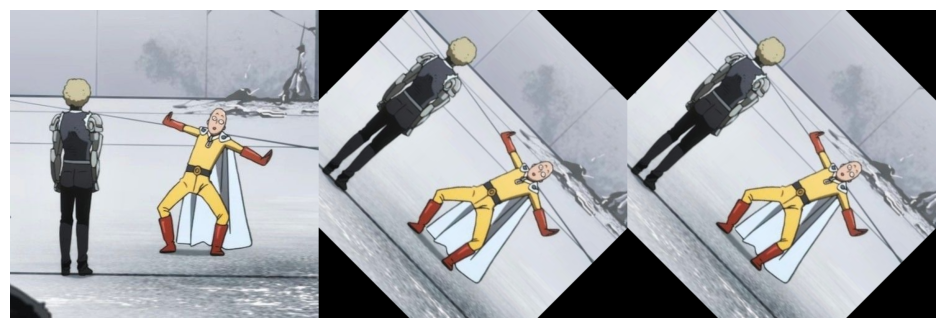

In [22]:
img = testImages[1]
shape = img.shape[:2]
center = (shape[1] // 2, shape[0] // 2)
rotationMatrix = cv2.getRotationMatrix2D(center, -45, 1) # center, angle, scale
rotatedImage = cv2.warpAffine(img, rotationMatrix, (shape[1], shape[0]))
rotatedImage2 = imutils.rotate(img, -45)
showImages([img, rotatedImage, rotatedImage2])

### Як розмити зображення?
gaussian blur

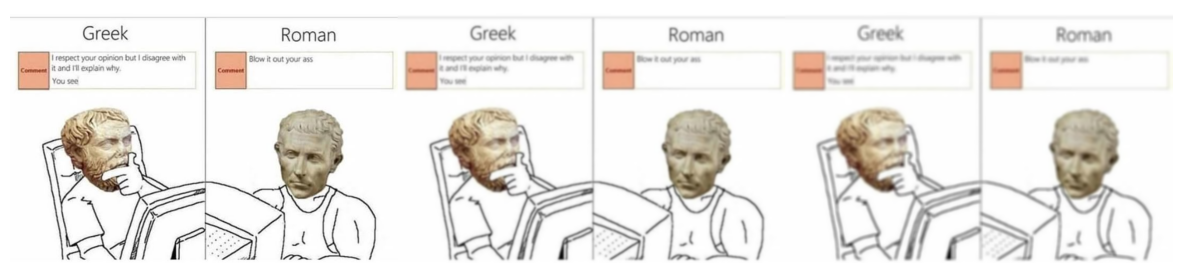

In [24]:
img = testImages[2]
blurredImage1 = cv2.GaussianBlur(img, (9,9), 0) # source, kernel size, blur std
blurredImage2 = cv2.GaussianBlur(img, (9,9), 3.0) # changed the std
showImages([img, blurredImage1, blurredImage2])

### Як намалювати прямокутник?

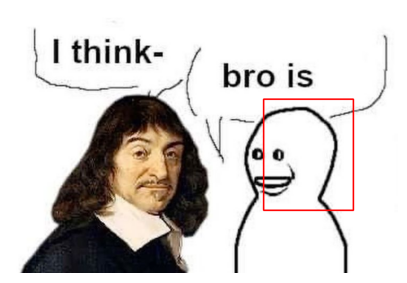

In [25]:
img = testImages[3].copy()
cv2.rectangle(img, (480, 170), (650, 380), (0, 0, 255), 2)
showImages([img])

### Як намалювати лінію?

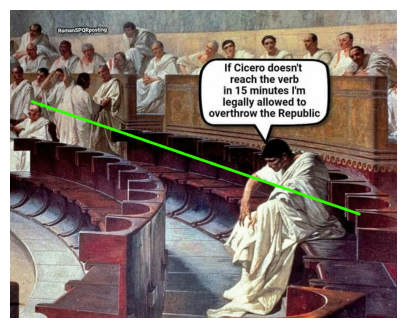

In [26]:
img = testImages[4].copy()
cv2.line(img, (40, 170), (650, 380), (0, 250, 50), 4)
showImages([img])

### Як намалювати коло та розмістити текст на зображенні??

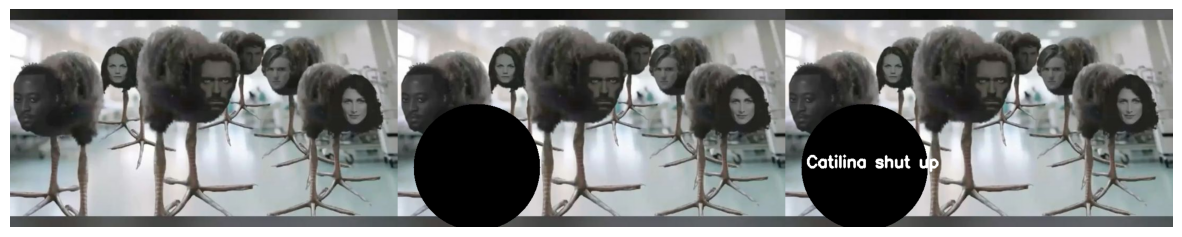

In [27]:
img = testImages[5]
imgCircle = img.copy()
cv2.circle(imgCircle, (150, 300), 120, (0, 0, 0), -1)
imgText = imgCircle.copy()
cv2.putText(imgText, 'Catilina shut up', (40, 300), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 3, cv2.LINE_8)
showImages([img, imgCircle, imgText])

### Як намалювати трикутник?

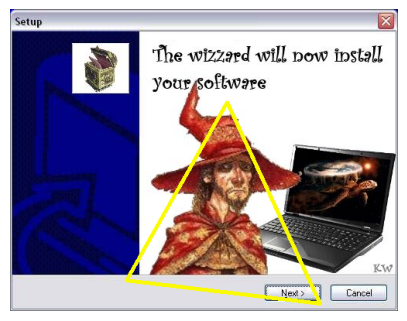

In [28]:
img = testImages[6].copy()
points = np.array([[[280, 120], [400, 380], [150, 350], [280, 120]]], dtype=np.int32)
cv2.polylines(img, points, 1, (0, 250, 250), 4)
showImages([img])